In [1]:
import numpy as np  # Importing the NumPy library and renaming it to "np"
import pandas as pd  # Importing the Pandas library and renaming it to "pd"
import matplotlib.pyplot as plt  # Importing the Pyplot module from the Matplotlib library and renaming it to "plt"
import seaborn as sns  # Importing the Seaborn library and renaming it to "sns"
%matplotlib inline 

In [2]:
#reading a CSV file named "IRIS.csv" into a pandas DataFrame and assigns it to the variable iris_df
iris_df = pd.read_csv(r"C:\Users\niraj\Downloads\IRIS.csv")

In [3]:
# calling first few rows of the datset
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#getting some info of the dataset and checking null values in the dataset
iris_df.info(), iris_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None,
 sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 species         0
 dtype: int64)

In [5]:
#exploratry data analysis 
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#counting the subclass present in the attribute species
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

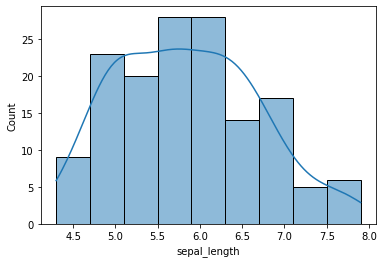

In [26]:
# creating a histogram of the "sepal_length" variable in the iris_df DataFrame
sns.histplot(iris_df['sepal_length'], kde=True)

C:\Users\niraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

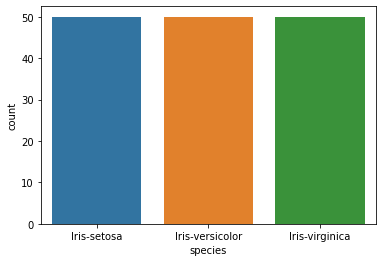

In [10]:
# counting all the subclass in the column species
sns.countplot('species', data=iris_df)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

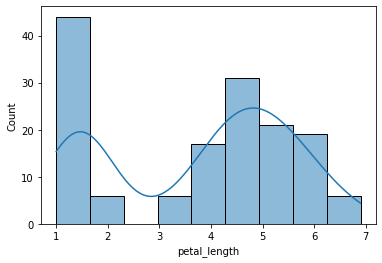

In [27]:
#creating histogram of 'petal_length'
sns.histplot(iris_df['petal_length'], kde=True)

In [14]:
# the correlation matrix between all pairs of numeric variables in the iris_df DataFrame
corr = iris_df.corr()

<ipython-input-14-f98b7b4882ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris_df.corr()


<AxesSubplot:>

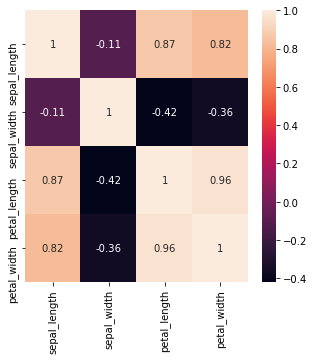

In [15]:
# creating heatmap of the correlation 
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True)

In [16]:
# creating a new DataFrame new_iris which is a copy of the original iris_df, but with the values in the "species" column replaced with numerical codes.
new_iris = iris_df.replace({'species':{'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2}})

In [17]:
new_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


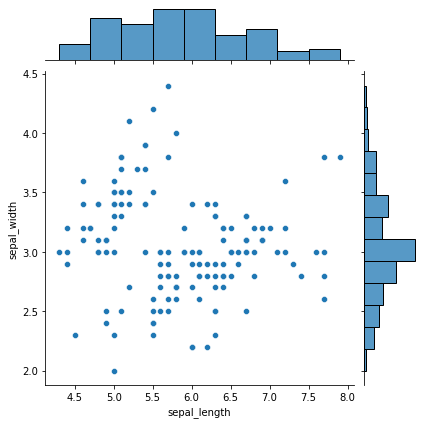

In [33]:
#  creating a scatter plot and a univariate histogram of the "sepal_length" and "sepal_width" variables in the iris_df DataFrame,  
sns.jointplot(x='sepal_length',y='sepal_width',data=iris_df,kind='scatter')

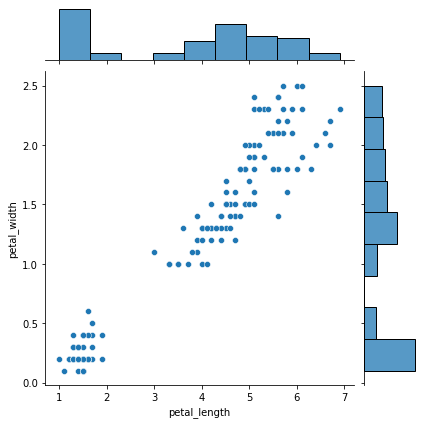

In [31]:
# creating a scatter plot and a univariate histogram of the "petal_length" and "petal_width" variables in the iris_df DataFrame
sns.jointplot(x='petal_length',y='petal_width',data=iris_df,kind='scatter')

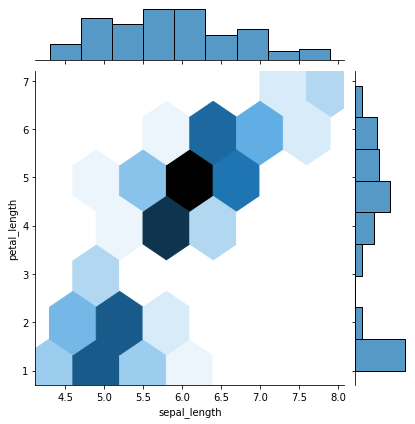

In [30]:
# creating a hexagonal bin plot and a univariate histogram of the "sepal_length" and "petal_length" variables in the iris_df DataFrame,
sns.jointplot(x='sepal_length',y='petal_length',data=iris_df,kind='hex')

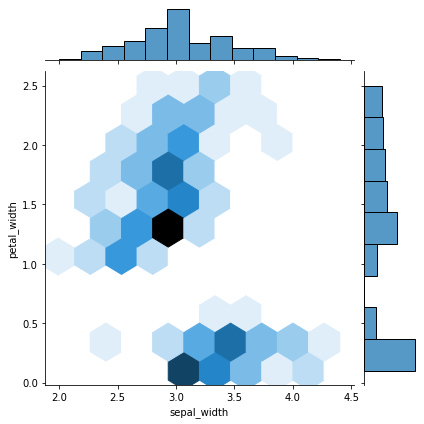

In [34]:
# creating a hexagonal bin plot and a univariate histogram of the "sepal_width" and "petal_width" variables in the iris_df DataFrame,
sns.jointplot(x='sepal_width',y='petal_width',data=iris_df,kind='hex')

# Model training and Evaluation 

In [36]:
# importing some functions from scikit-learn (sklearn) library and then using them to split the data into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [41]:
#splitting data into input variable 'x' and output variable 'y'
x = iris_df.drop(columns=['species'])
y = iris_df['species']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [43]:
# creating a LogisticRegression object from scikit-learn (sklearn) library.
Lr = LogisticRegression()

In [44]:
#fit the model using the training data
Lr.fit(x_train,y_train)

#use model to make predictions on test data
x_test_pred = Lr.predict(x_test)
x_train_pred = Lr.predict(x_train)

In [45]:
# lassification report for the logistic regression model using the classification_report() function from the metrics module of scikit-learn (sklearn) library.
classification_report = metrics.classification_report(y_test, x_test_pred)
classification_report1 =  metrics.classification_report(y_train, x_train_pred)

In [46]:
classification_report, classification_report1

('              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        14\n           1       1.00      0.88      0.93         8\n           2       0.89      1.00      0.94         8\n\n    accuracy                           0.97        30\n   macro avg       0.96      0.96      0.96        30\nweighted avg       0.97      0.97      0.97        30\n',
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        36\n           1       0.98      0.95      0.96        42\n           2       0.95      0.98      0.96        42\n\n    accuracy                           0.97       120\n   macro avg       0.98      0.98      0.98       120\nweighted avg       0.98      0.97      0.97       120\n')

In [47]:
cnf_matrix = metrics.confusion_matrix(y_test, x_test_pred)

In [48]:
cnf_matrix

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]], dtype=int64)

In [53]:
print('Accuracy of test data:', Lr.score(x_test, y_test)*100)

Accuracy of test data: 96.66666666666667


In [54]:
print('Accuracy of train data:', Lr.score(x_train, y_train)*100)

Accuracy of train data: 97.5


In [56]:
(14+7+8)/(14+7+8+1)*100

96.66666666666667

In [58]:
# Perform 5-fold cross-validation
scores = cross_val_score(Lr, x, y, cv=3, scoring='accuracy')

# Print average accuracy across all folds
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validation accuracy: 0.97 (+/- 0.02)


C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### the average accuracy of the model is 0.97, which means that it correctly predicted the class labels of 97% of the samples in the test data. The "+/- 0.02" part of the output indicates the variability of the accuracy scores across different folds of the cross-validation procedure. Specifically, it means that the range of accuracy scores is between 0.95 and 0.99, with a standard deviation of 0.01.

In [59]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# creating a object from scikit-learn (sklearn) library.
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

#fit the model using the training data
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)

# Make predictions on the test data
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)
svm_pred = svm.predict(x_test)

# Evaluate the performance of the classifiers
dt_score = dt.score(x_test, y_test)
rf_score = rf.score(x_test, y_test)
svm_score = svm.score(x_test, y_test)

# Print the scores
print('Decision Tree accuracy:', dt_score)
print('Random Forest accuracy:', rf_score)
print('SVM accuracy:', svm_score)

Decision Tree accuracy: 0.9333333333333333
Random Forest accuracy: 0.9666666666666667
SVM accuracy: 0.9666666666666667


#### The Decision Tree model achieved an accuracy of 0.9333, which means that it correctly predicted the class labels of 93.33% of the samples in the test data.

#### The Random Forest model achieved an accuracy of 0.9667, which is higher than that of the Decision Tree model. This indicates that the Random Forest model performed better than the Decision Tree model and was able to correctly predict the class labels of 96.67% of the samples in the test data.

#### The SVM model also achieved an accuracy of 0.9667, which is the same as that of the Random Forest model. This suggests that the SVM model performed equally well as the Random Forest model in predicting the class labels of the samples in the test data.